# Project Intro:  #

 ### Tourism Demand Forecasting:
    Predicting tourists arrival help destinations to make neccessary arrangements and help tourism businesses to make efficient financial decisions in terms of allocating resouces,staffing,controlling expenditure and exploring oppurtunities for expansion. Every tourist place has it's own speciality to attract tourists.  Influence of it on tourists may depend on the season,day speciality,it's trend on social media,Geometric location etc.. So,for every tourist place the features to consider may change according to its speciality.
    
    Machine learning algorithms are used to detect the pattern of trends in tourism arrivals and helps to forecast future arrivals. Here we created a model to forecast arrivals for the tourist place Tirumala Tirupati Devastanam(TTD). We have considered attributes Day Speciality(whether day is festival,ttd_speciality on that day,public holiday or normal day),Weather condition(Based on temperature),Google Trends(frequency of ttd related keywords searched on goolgle),Twitter trend(whether opinion of twitter is +ve,-ve or neutral).
    We tried to find the features(things that will effect the tourists) with help of correlation between attributes and tourists. If they have meaningful impact on arrivals,we consider it be a feature for our model. Gone through different approaches to properly understand available data and perform better.

In [42]:
import numpy as np
import pandas as pd
data=pd.read_csv('TTD_DATA.csv')

In [43]:
del data['Unnamed: 0']
data

,Date,Piligrims,Tonsures,Hundi,Temperature,Condition,ttd online darshan tickets,Tirupati,Tirumala,VIP darshan,...,Review,Timestamp,Day,Speciality,Festivals,Tidi,Seva_Begins,Sevas,Public_Day,Normal
0,2022-1-1,36560,14084,2.15,77,1275,0,43,23,16,...,-1,1.640975e+09,Saturday,New Years Day,0,0,0,0,1,0
1,2022-1-2,38894,12270,3.93,79,972,6,41,25,14,...,0,1.641062e+09,Sunday,"Amavasya, Sravanam, Tirupati Sri G.T Adhyayano...",0,1,1,0,0,0
2,2022-1-3,31776,16046,2.69,79,972,10,40,19,0,...,0,1.641148e+09,Monday,"Maha Sivaratri, Tirupati Sri KT Nandi Vahanam",1,0,0,1,0,0
3,2022-1-4,31523,14692,2.45,79,972,0,45,17,22,...,0,1.641235e+09,Tuesday,Amavasya,0,1,0,0,0,0
4,2022-1-5,32044,17558,2.61,79,972,8,32,14,21,...,1,1.641321e+09,Wednesday,May Day,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,70496,25500,5.88,79,1275,34,80,65,56,...,0,1.672079e+09,Tuesday,normal,0,0,0,0,0,1
361,2022-12-28,71299,28288,3.26,82,972,37,74,59,52,...,1,1.672166e+09,Wednesday,normal,0,0,0,0,0,1
362,2022-12-29,67156,24752,4.92,82,862,0,75,52,17,...,0,1.672252e+09,Thursday,normal,0,0,0,0,0,1
363,2022-12-30,63253,24490,5.16,82,972,22,77,56,14,...,0,1.672339e+09,Friday,normal,0,0,0,0,0,1


In [135]:
data.columns

Index(['Date', 'Piligrims', 'Tonsures', 'Hundi', 'Temperature', 'Condition',
       'ttd online darshan tickets', 'Tirupati', 'Tirumala', 'VIP darshan',
       'How to reach Tirupati', 'ttd sarva darshan tickets',
       'ttd free darshan online booking availability',
       'apsrtc tirumala darshan tickets', 'apsrtc ttd 300 tickets',
       'ksrtc tirupati package', 'srinivasam complex',
       'tirumala darshan tickets', 'tirumala darshan',
       'tirupati balaji.ap.gov.in', 'tirupati darshan 500 rupees ticket',
       'Week_day', 'Review', 'Timestamp', 'Day', 'Speciality', 'Festivals',
       'Tidi', 'Seva_Begins', 'Sevas', 'Public_Day', 'Normal'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(data[['Week_day','Temperature','Tirupati',
       'Tirumala','Review','VIP darshan','Timestamp','tirumala darshan']],data['Piligrims'],test_size=0.27,random_state=3)

In [76]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Visualization : #

In [77]:
import plotly.express as px
fig = px.area(data, x='Date', y="Piligrims",title='2022 TTD pilgrims Arrivals:')
fig.show()

In [78]:
fig = px.scatter(data, x='Piligrims', y="Tonsures",title='Pilgrims VS Tonsures')
fig.show()

In [79]:
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt

In [80]:
cols=data.select_dtypes(include=np.number).columns.tolist()
l=len(cols)
res=[]
for i in range(l):
    corr,_=stats.pearsonr(data[cols[0]].tolist(),data[cols[i]].tolist())
    if(corr>0.2 or corr<-0.2):
        res+=[[(cols[0],cols[i]),corr]]
        print(cols[i],end=" , ")
print("\n",res)

Piligrims , Tonsures , Hundi , Temperature , Tirupati , Tirumala , VIP darshan , Week_day , Timestamp , 
 [[('Piligrims', 'Piligrims'), 0.9999999999999982], [('Piligrims', 'Tonsures'), 0.8572929983934131], [('Piligrims', 'Hundi'), 0.6399828942919743], [('Piligrims', 'Temperature'), 0.2724375735704814], [('Piligrims', 'Tirupati'), 0.5949582772666608], [('Piligrims', 'Tirumala'), 0.332022380013128], [('Piligrims', 'VIP darshan'), 0.3088058993645298], [('Piligrims', 'Week_day'), 0.24441067668084554], [('Piligrims', 'Timestamp'), 0.516230692026717]]


In [81]:

#plt.figure(figsize=(15,15))
fig=px.imshow(data.corr())
fig.update_layout(
    autosize=False,
    width=1800,
    height=1800,)

<AxesSubplot:title={'center':'Piligrims'}, xlabel='Condition'>

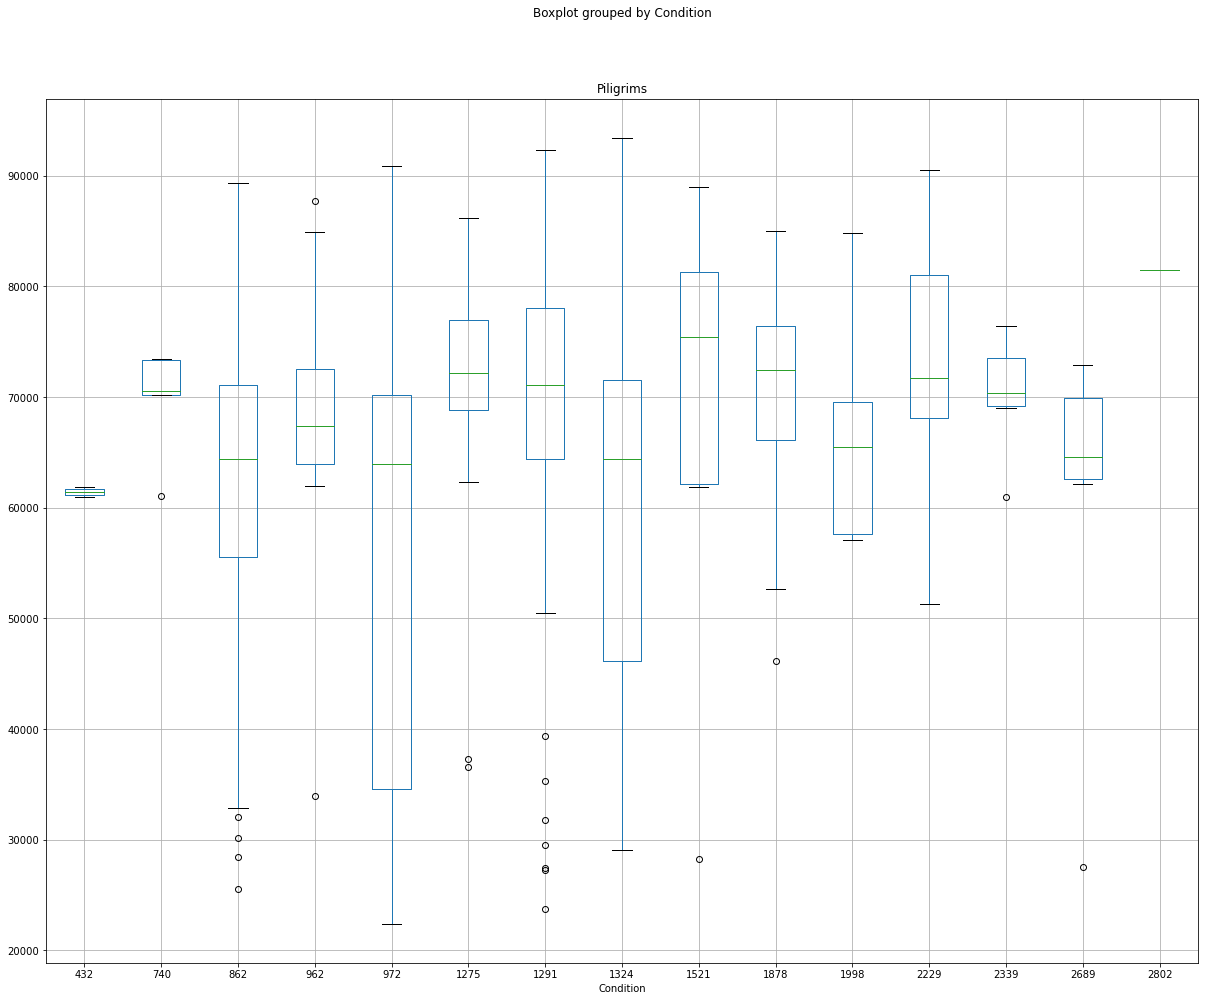

In [82]:
data.boxplot(column='Piligrims',by='Condition',figsize=(20,16))

<AxesSubplot:title={'center':'Piligrims'}, xlabel='Day'>

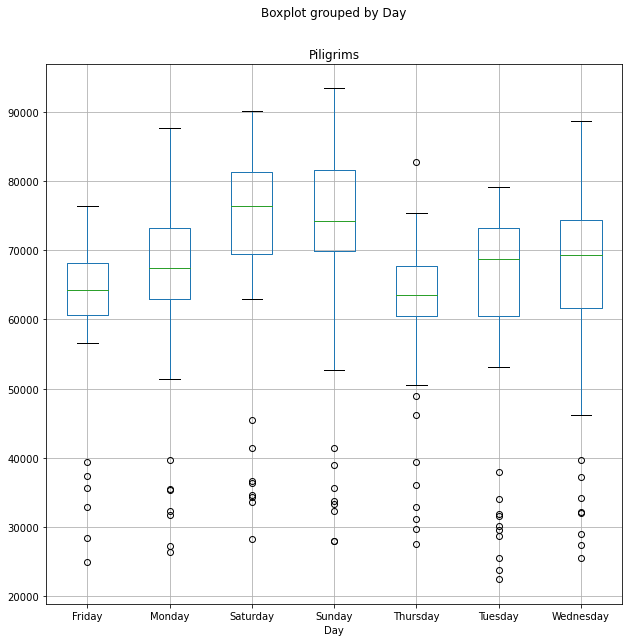

In [83]:
data.boxplot(column='Piligrims',by='Day',figsize=(10,10))

#  Models :


##  Light Gradient Booting Machine Regressor(LGBMRegressor) :

In [84]:
import lightgbm as lgb

In [105]:
x_train,x_test,y_train,y_test=train_test_split(data[['Week_day','Temperature','Tirupati',
       'Tirumala','Review','VIP darshan','Timestamp','tirumala darshan']],data['Piligrims'],test_size=0.27,random_state=3)

In [106]:
#Model Training
model1=lgb.LGBMRegressor()
model1.fit(x_train,y_train)


LGBMRegressor()

In [107]:
#Model Testing
model1.score(x_test,y_test)

0.862921589008814

In [108]:
#Evaluating Model
y_pred=model1.predict(x_test)
print('R2_Score:',r2_score(y_test,y_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

R2_Score: 0.862921589008814
Mean_Squared_Error: 37141157.63296289
Mean Absolute Error: 4772.399706448122


In [88]:
#Visualizing Results
fig = px.line( y=[y_pred,y_test])
fig.show()

## Linear Regression : ##

In [109]:
from sklearn.linear_model import LinearRegression

In [114]:
x_train,x_test,y_train,y_test=train_test_split(data[['Week_day','Temperature','Tirupati',
       'Tirumala','Review','VIP darshan','Timestamp','tirumala darshan']],data['Piligrims'],test_size=0.27,random_state=3)

In [115]:
#Model Training
model2=LinearRegression()
model2.fit(x_train,y_train)


LinearRegression()

In [116]:
model2.score(x_test,y_test)

0.7625435135074452

In [117]:
#Modle Evaluation
y_pred=model2.predict(x_test)
print('R2_Score:',r2_score(y_test,y_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

R2_Score: 0.7625435135074452
Mean_Squared_Error: 64338423.03845048
Mean Absolute Error: 6389.992184189226


In [93]:
#Visualing Results
fig = px.line( y=[y_pred,y_test])
fig.show()

## Decision Tree Regression ##

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
x_train,x_test,y_train,y_test=train_test_split(data[['Week_day','Temperature','Tirupati',
       'Tirumala','Review','VIP darshan','Timestamp','tirumala darshan','Festivals',]],data['Piligrims'],test_size=0.27,random_state=3)

In [120]:
#Training Model
model3=DecisionTreeRegressor()
model3.fit(x_train,y_train)

DecisionTreeRegressor()

In [121]:
model3.score(x_test,y_test)

0.7825208179086272

In [122]:
#Model Evalution
y_pred=model3.predict(x_test)
print('R2_Score:',r2_score(y_test,y_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))  

R2_Score: 0.7825208179086272
Mean_Squared_Error: 58925607.07070707
Mean Absolute Error: 5357.292929292929


In [123]:
#Visualizing Results
fig = px.line( y=[y_pred,y_test])
fig.show()

## xgboost: ##

In [124]:
import xgboost as xgb

In [129]:
x_train,x_test,y_train,y_test=train_test_split(data[['Week_day','Temperature','Tirupati',
       'Tirumala','Review','VIP darshan','Timestamp','tirumala darshan']],data['Piligrims'],test_size=0.27,random_state=3)

In [130]:
dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test,label=y_test)
print(dtrain)

In [131]:
param={
    'objective':'reg:squarederror',
    'max_depth':5,
    'eta':0.4,
    'subsample':0.8,
    'colsample_bytree':0.8
}
num_round=10
model4=xgb.train(param,dtrain,num_round)
y_pred=model4.predict(dtest)

In [132]:
#Model Evalution
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)
print(mean_absolute_error(y_test,y_pred))

42916496.73204056
0.8416063054503333
5039.84260574495


In [128]:
#Visualizing Results
fig = px.line( y=[y_pred,y_test])
fig.show()

# Comparision Matrix:   #

In [104]:
print("%-40s %-30s %-30s %-30s"%("Model","R2_Score","Mean_Squared_Error","Mean_Aboslute_Error"))
print("%-40s %-30s %-30s %-30s"%("=====","========","==================","==================="))
l=[0,model1,model2,model3]
m=[0,'LightGradientBoostingMachine','LinearRegression','DecisionTreeRegression']
for i in range(1,4):
    y_pred=l[i].predict(x_test)
    print("%-40s %-30f %-30f %-30f"%(m[i],r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)))
y_pred=model4.predict(dtest)
print("%-40s %-30f %-30f %-30f"%("XGBoost",r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)))

Model                                    R2_Score                       Mean_Squared_Error             Mean_Aboslute_Error           
=====                                    ========                       ==================             ===================           
LightGradientBoostingMachine             0.862922                       37141157.632963                4772.399706                   
LinearRegression                         0.762544                       64338423.038450                6389.992184                   
DecisionTreeRegression                   0.651884                       94321403.787879                6056.494949                   
XGBoost                                  0.841606                       42916496.732041                5039.842606                   


# Conclusion: #

 LGBMRegressor gives better results among all model. The Accuracy can be more improved by find more related features(such as collecting google trends of more related keywords).